A script to pull all lab grade files (will pull any file that ends with .xls)
and try different grading distributions. This analysis does not drop the
lowest lab score, nor does it scale up the prelab and quizzes for lab 9.


In [14]:
from __future__ import print_function
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

Load Data and set up the Data Frame to be used.

In [15]:
filelist = glob.glob('*.xls')
df_list = [pd.read_csv(filename,encoding='utf-16',sep='\t',header=0) for filename in filelist]
for x in df_list:
    #Define the columns we want to keep
    keep = [j for j in x.columns if 'PreLab' in j]\
    +[k for k in x.columns if 'Quiz' in k]\
    +[l for l in x.columns if 'Conclusion' in l]
    #Drop any columns that are not the ones we want to keep
    drop_index = x.columns.difference(keep)
    x.drop(drop_index,axis=1,inplace=True)

    #Since I pulled in multiple tritoned files, each column has a slightly
    #different name, this just unifies the column headers to be entirely
    #the same so they merge properly when concatenated
    x.columns = df_list[0].columns

#Concatenate all grade data into one dataframe
df = pd.concat(df_list)
#All the files have a row index that starts counting with 1 and goes up
#to the number of students. When using multiple files, that means there
#are multiple rows with the index 1, 2, 3, etc. This resets that, starting
#from the count of one and goes up to the total number of students between
#all files
df.reset_index(drop=True,inplace=True)

#Removes any NaN values and replaces them with zero
df.fillna(0.0)

#Removes the administrative names with zero score
total_scores = np.sum(df,axis=1)
remove_lines = [i for i , x in enumerate(total_scores) if x==0]
df.drop(index=remove_lines,inplace=True)

### Quiz - 5, Conclusion - 10, Prelab - 5, total points 170

Normal Mean and STD:
0.793537865978464
0.09931500836794094


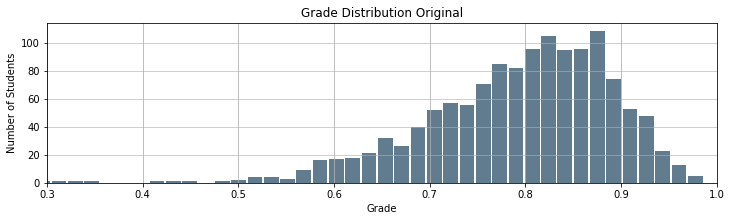

In [23]:
# Resum all scores without admins and scale by total points possible
total_scores = np.sum(df,axis=1)/170.0
#170 pts total

bin_num = 60
plt.figure(1,figsize=(12,10))
ax1 = plt.subplot(311)
hist = pd.Series(total_scores)

hist.plot.hist(grid=True, bins=bin_num, rwidth=0.9,
                   color='#607c8e')
plt.title('Grade Distribution Original')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.xlim([0.3,1])
plt.grid(axis='y', alpha=0.75)

#This is the normal mean and std
print('Normal Mean and STD:')
print(np.mean(total_scores))
print(np.std(total_scores))

### Quiz - 5, conclusion - 10, total points 125

15 Point Normal Mean and STD:
0.7723927382753404
0.10694713417636846


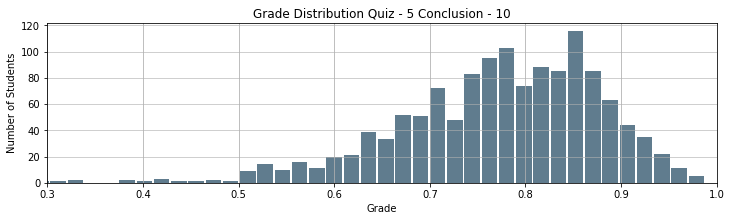

In [24]:
quiz_columns = [k for k in df.columns if 'Quiz' in k]
conclusion_columns = [l for l in df.columns if 'Conclusion' in l]

partial_columns = quiz_columns + conclusion_columns

total_scores = np.sum(df[partial_columns],axis=1)/125.0

plt.figure(figsize=(12,10))
plt.subplot(312,sharex=ax1)
hist = pd.Series(total_scores)

hist.plot.hist(grid=True, bins=bin_num, rwidth=0.9,
                   color='#607c8e')
plt.title('Grade Distribution Quiz - 5 Conclusion - 10')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.grid(axis='y', alpha=0.75)

print('15 Point Normal Mean and STD:')
print(np.mean(total_scores))
print(np.std(total_scores))

### Quiz 8, Conclusion - 12, total points 168

12- Conclusion, 8 - Quiz Mean and Standard Deviation:
0.7703533607088826
0.1073652526157203


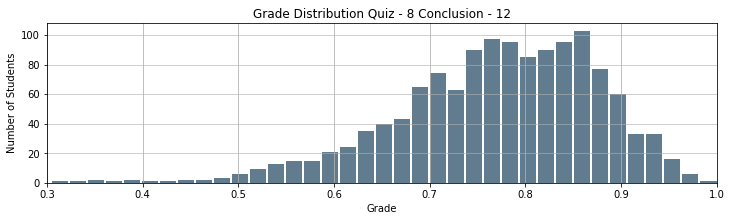

In [26]:
#This usage causes a warning because changes in this sub data frame
#do not return to the original data frame. This is the usage I intended
#So the warning may be ignored.
partial_scores = df[partial_columns]
partial_scores[quiz_columns] = partial_scores[quiz_columns]*8.0/5.0
partial_scores[conclusion_columns] = partial_scores[conclusion_columns]*12.0/10.0

total_scores = np.sum(partial_scores,axis=1)/168.0

plt.figure(figsize=(12,10))
plt.subplot(313,sharex=ax1)
hist = pd.Series(total_scores)

hist.plot.hist(grid=True, bins=bin_num, rwidth=0.9,
                   color='#607c8e')
plt.title('Grade Distribution Quiz - 8 Conclusion - 12')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.grid(axis='y', alpha=0.75)

print('12- Conclusion, 8 - Quiz Mean and Standard Deviation:')
print(np.mean(total_scores))
print(np.std(total_scores))